This notebook is to go through basic procedures of genetic algorithm (GA).

References:

https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/, 

https://www.codewars.com/kata/567d609f1c16d7369c000008

## Step 1: 

https://www.codewars.com/kata/567d609f1c16d7369c000008

A genetic algorithm is based in groups of chromosomes, called populations. To start our population of chromosomes we need to generate random binary strings with a specified length.

In this kata you have to implement a function ```generate``` that receives a ```length``` and has to return a random binary string with length characters.

(In practice, any real-life input will be first converted into a bit string, which is another big topic and we will touch it later...)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#we use ranint to randomly generate 0 or 1
dig_series_text = str(np.random.randint(0, 2, size = 4))

In [3]:
dig_series_no_bracket = dig_series_text[1:-1]

In [4]:
def generate(length:int):
    """
    example, length = 4, return a random series with 4 bits, for example, 1000, 1001, ..., 1111
    note that this randint is returning a np.ndarray, if directly convert to string, it will contain space and brackets..
    """
    dig_array = np.random.randint(0, 2, size = length)
    dig_series_text = str(dig_array)[1:-1].replace(" ", "").replace("\n", "")
    
    return dig_series_text

In [5]:
#example of step 1
generate(100)

'1110100001111010001100111110010011101000110110100101001011110011100100001000110010110101111000011101'

## Step 2 Mutation

https://www.codewars.com/kata/genetic-algorithm-series-number-2-mutation

Mutation is a genetic operator used to maintain genetic diversity from one generation of a population of genetic algorithm chromosomes to the next.

For example, 1 to 0 or 0 to 1, with a given probability.

The "chromosomes" mentioned in the question refers to the ```dig_series_text``` returned in the ```generate``` step.


We use the philosophy of monte-carlo (reject/accept regime) here:

- Generate a random number between 0 and 1.
- For a given probability ```prob```, if the random number is below this probability, accept the change (i.e., mutate); otherwise, reject the change (i.e., remain).

In [6]:
mutate_rule = {
    '0' : '1',
    '1' : '0'
}


def mutation(chrom:str, prob:float) -> str:
    """
    prob is the probability for a given chromosomes, i.e., '0' or '1', to mutate into the opposite.
    """
    dig_series_after_mutate = []
    for dig_text in chrom:
        #convert text to int
        dig = int(dig_text)
        
        #generate a random number to compare with acceptance threshold. i.e., prob
        mutate_this_dig = np.random.rand()
        if mutate_this_dig < prob:
            dig_series_after_mutate.append(mutate_rule[dig_text])
        #else remain same
        else:
            dig_series_after_mutate.append(dig_text)
    
    mutated_chrom = "".join(dig_series_after_mutate)
    return mutated_chrom

In [7]:
length = 100
prob = 0.5
chrom = generate(length)
print(f"original chromosomes:\n {chrom}.\n")
mutated_chrom = mutation(chrom, prob)
print(f"mutated chromosomes:\n {mutated_chrom}.\n")

original chromosomes:
 1001011100101001111010010000011110010100110011011111010110111111100011101110000111011101101001001001.

mutated chromosomes:
 0001010111001100111000010111011100011101110010001000111110000000001011110010011111110110011011100011.



## Step 3 Crossover

https://www.codewars.com/kata/genetic-algorithm-series-number-3-crossover

In genetic algorithms, crossover is a genetic operator used to vary the programming of chromosomes from one generation to the next.

The one-point crossover consists in swapping one's chromosome part with another in a specific given point/cut point (```index```). 

For example, the cut point index is set as 4, a chromosome 1 "10101111" and a chromosome 2 "11011001" will be cut after the 4th digit (0), and everything after the 4th digit will be swapped with each other, yielding [chromosome 3, chromosome 4]:  ["10101001", "11011111"].

In [8]:
def crossover(chrom_1, chrom_2, cut_point_index):
    chrom_3_list = []
    chrom_4_list = []
    for i in range(len(chrom_1)):
        if i < cut_point_index:
            chrom_3_list.append(chrom_1[i])
            chrom_4_list.append(chrom_2[i])
        else:
            chrom_3_list.append(chrom_2[i])
            chrom_4_list.append(chrom_1[i])
    chrom_3 = "".join(chrom_3_list)
    chrom_4 = "".join(chrom_4_list)
    return chrom_3, chrom_4
    

In [9]:
chrom_1 = mutation(generate(length), prob)
chrom_2 = mutation(generate(length), prob)

cut_point_index = 10

chrom_3, chrom_4 = crossover(chrom_1, chrom_2, cut_point_index)

print(f"{chrom_1=},\n{chrom_2=},\n{chrom_3=},\n{chrom_4=}\n")

chrom_1='0101010000000011001110110000111100100000000100011101110110110101001111100110101100001101001110110010',
chrom_2='1001010001110011110011011100100111100001000011010101011001101001101101110110101000010110010111010101',
chrom_3='0101010000110011110011011100100111100001000011010101011001101001101101110110101000010110010111010101',
chrom_4='1001010001000011001110110000111100100000000100011101110110110101001111100110101100001101001110110010'



## Step 4 Get population and fitness

https://www.codewars.com/kata/genetic-algorithm-series-number-4-get-population-and-fitnesses

This step will compare the difference between the given chromosome with the ```ideal``` situation, quantified by a ```fitness``` function.

The ```fitness``` function is another big topic related to how to properly optimise the outcome.. Here we use the given example in the codewars keta.

```fitness``` can reflect the quality of individual. 

For example, fitness between 0.8 to 1 means this chromosome is very healthy and very likely to survive, thus it shares the largest portion of roulette wheel, i.e., largest probability to survive (56% for example).

Fitness between 0.4 to 0.8 means this chromosome is okay to live to, let's say, average life span, so second large portion of the wheel...

Fitness between 0.2 to 0.4 means this chromosome is not likely to survive till adulthood, maybe only a few percentage.

Fitness below 0.2 means, very likely, this chromosome cannot even develop into an embryo, perhaps smaller than 1%.

In [10]:
ideal = generate(length)
print(f"{ideal=}\n")

ideal='1001100001001011101001001111001100100011101001001101110101010100001110111001100010111100010001010111'



In [11]:
def get_fitness(ideal):
    def fitness(test):
        """
        test is the test chromosome to compare with the ideal chromosome
        the similarity/fitness between test and ideal is quantified by calculating how many digits match with each other
        """
        match_record = 0
        for i, base in enumerate(test):
            if base == ideal[i]:
                match_record += 1
        this_fitness = float(match_record/len(ideal))
        return this_fitness
    return fitness
    

def generate_population(length, pop_size):
    """
    generate pop_size chromosomoes with given length
    """
    population = []
    for i in range(pop_size):
        population.append(generate(length))
    return population


In [12]:
pop_size = 10
population = generate_population(length, pop_size)
print(f"{population=}\n")

population=['1001100100110001100111011110000001010100110011110110101011001001100110011010100001010000001110000010', '1100010010010000101010110110010010110100101000000001101001010000010011110101100110001111100111011111', '1111100111110111010000101100111011001010001000111000110000100010100100100011001111111100101110100100', '0001010111001101010100111011111011011101101011101001111010000000111111101000101000011000010010010110', '1100001100000110011000111100101101111011010101010101111000010100110111010110011111000101110001011000', '0000101000100100001000000001111011000110101111011011100101000111011011011001110001111111010110111000', '0000101011111000000110010010101000110101111001010111001010001100100010100100001011011100001000011110', '1000011001000010000110110011001100011110011110101001011011011011011101000100100011110010011111100110', '0111110010010110001110001110000100010101011011000111110101001111111100010111100001101111000011100001', '010110100010101011000011010011001011110001101110000

In [13]:
def map_popluation_fit(population, fitness):
    pop_fit_map = {}
    for test in population:
        this_fitness = fitness(test)
        pop_fit_map[test] = this_fitness
    return pop_fit_map
        

In [14]:
map_popluation_fit(population, get_fitness(ideal))

{'1001100100110001100111011110000001010100110011110110101011001001100110011010100001010000001110000010': 0.47,
 '1100010010010000101010110110010010110100101000000001101001010000010011110101100110001111100111011111': 0.53,
 '1111100111110111010000101100111011001010001000111000110000100010100100100011001111111100101110100100': 0.45,
 '0001010111001101010100111011111011011101101011101001111010000000111111101000101000011000010010010110': 0.54,
 '1100001100000110011000111100101101111011010101010101111000010100110111010110011111000101110001011000': 0.48,
 '0000101000100100001000000001111011000110101111011011100101000111011011011001110001111111010110111000': 0.52,
 '0000101011111000000110010010101000110101111001010111001010001100100010100100001011011100001000011110': 0.5,
 '1000011001000010000110110011001100011110011110101001011011011011011101000100100011110010011111100110': 0.47,
 '0111110010010110001110001110000100010101011011000111110101001111111100010111100001101111000011100001': 0.53,
 '

## Step 5

Ideally, we will now sort all the chromosomes according to the fitness.. but sortings things is expensive, especially if we have millions of populations.. (even the best sorting algorithm still needs $O(n\log{n})$ complexity, and the implementation is not very straightforward).

SO here we use monte-carlo again!

The keta called it Roulette wheel (or Fitness Proportionate) selection.

https://www.codewars.com/kata/genetic-algorithm-series-number-5-roulette-wheel-selection

The basic idea is to set different levels of (discrete) probability thresholds, which matches with different quality of the species.

Populations with the best fitnesses should cover the largest proportion.

The probability to select each individual, $P_i = \frac{f_i}{\sum(f_i)}$

and that is the function of ```select```

In [37]:
#now it will be a bit abstract...
#This is monte-carlo again.
#we will generate a series of probability that each individual in the current population will be selected
#we will generate another series of random number between 0 to 1, with the length equals the size of population before mutation happens
#then, without doing any sorting, we start from the first element in the current population, substract its select_probability from this round of random number
#until 0 or negative
#the last number that causes it cross 0 will be selected.

#here's an example
initial_size_of_population = 100
size_of_population_after_mutation = 200

#this is an imaginary series of probability to select each individual, in practice it will be the normalised fitness
imagine_probability_of_selection = np.random.rand(size_of_population_after_mutation)
imagine_probability_of_selection = imagine_probability_of_selection/np.sum(imagine_probability_of_selection)


print(f"{imagine_probability_of_selection=}")

#now we generate another series of lucky numbers, with the size of initial population
lucky_numbers = np.random.rand(initial_size_of_population)
print(f"{lucky_numbers=}")

#now we will select the subset as the initial population for the next generation
selected_kid_id = []
selected_kid_prob = []

all_prob_of_sel = list(imagine_probability_of_selection.copy())

#This version: all_prob_of_sel needs to be updated every cycle,
#i.e., the selected child will be removed from the parent+children pool

#we didn't pass the initial chromosome info in this function but we can get the id of selected child instead
#later on this can be envelopped into a class to make the interaction with other function/variables easier.

#remember after each selection, we need to update the probability of remaining species to renoramlise it to one

for lucky_number in lucky_numbers:    
    
    for i, prob_to_select_this_kid in enumerate(all_prob_of_sel):
        
        if i in selected_kid_id:
            pass
        else:
            lucky_number -= prob_to_select_this_kid
            #the last kid that cause the lucky_number passing 0 is selected
            if lucky_number < 0:
                selected_kid_id.append(i)
                selected_kid_prob.append(prob_to_select_this_kid)
                
                #renormalisation of the probability of the rest of kids
                #removing a kid from the dataset without messing up the sequence would be a headache..
                #my way is to update the just-selected probability to 0, and renormalise the whole probability list
                all_prob_of_sel[i] = 0
                all_prob_of_sel_array = np.asarray(all_prob_of_sel)
                new_prob_sum = np.sum(all_prob_of_sel_array)
                all_prob_of_sel_array = all_prob_of_sel_array/new_prob_sum
                all_prob_of_sel = list(all_prob_of_sel_array)
                
                break

print(f"{selected_kid_id=}")
print(f"{selected_kid_prob=}")
print(f"{all_prob_of_sel=}")

    
    


imagine_probability_of_selection=array([2.55416022e-03, 7.55387789e-03, 3.74089902e-03, 4.65264693e-03,
       6.01931836e-03, 7.01265394e-03, 8.78556106e-03, 2.34496266e-03,
       3.84700242e-03, 1.08905459e-03, 4.88636416e-03, 8.21788082e-03,
       9.44052823e-03, 5.86114706e-03, 1.58945375e-03, 1.55011360e-03,
       9.37446060e-03, 9.68007843e-03, 4.32673187e-03, 2.81999863e-03,
       5.38153489e-03, 4.31163630e-03, 8.62776877e-03, 7.69146955e-03,
       4.56308577e-03, 1.70506669e-03, 9.48305299e-03, 8.17649608e-03,
       1.12884929e-03, 9.31812074e-03, 8.12858409e-03, 3.44170183e-03,
       4.76669958e-03, 6.01333490e-03, 2.20846313e-03, 3.46679549e-03,
       7.51847436e-03, 8.34310831e-03, 1.47606653e-03, 2.72772275e-03,
       3.41323285e-03, 4.43025718e-03, 2.62897901e-03, 4.14854060e-03,
       6.18757576e-03, 4.30909513e-03, 5.50300124e-03, 4.56919154e-03,
       9.56282183e-03, 5.40809227e-03, 7.94500435e-03, 5.20673653e-03,
       5.63417824e-03, 5.10132932e-03, 8.996

In [38]:
sum(all_prob_of_sel)

1.0

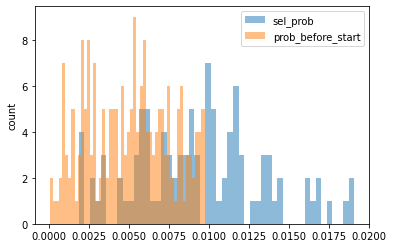

In [67]:
#now we have a look at the distribution of selected kid's probability compared to the situation before the selection start

selected_kids_probs = np.asarray(selected_kid_prob)

plt.hist(selected_kids_probs, bins = 50, alpha = 0.5, label = "sel_prob")
# plt.hist(lucky_numbers, bins = 50, alpha = 0.5, label = "lucky_number")
plt.hist(imagine_probability_of_selection, bins = 50, alpha = 0.5, label = "prob_before_start")
plt.ylabel("count")
plt.legend()

#we can see the sel_prob is expanding to double of the situation before starts
#that make sense as we are updaing the probability of the whole population every time after removing an element
#in total we are selecting 50% out of all, so the probability of remaining kids will gradually grow into the rescaled 1
#i.e., doubled of the original 1

#don't worry about the looks-very-low scale, remember their accumulated probability would need to be 1

In [56]:
#Now we apply the same method to the real chromosomes population

def select(population, fitness, keep_frac = 0.5):
    """
    population: list of current chromosomes
    fitness: the function to calculate the fitness of each chromosome from the ideal chromosome
    keep_frac: the fraction to be kept from current population, float from 0 to 1.
    """
    
    #first, workout the fitness of all chromosomes in the population
    
    all_fitnesses = []
    for i, chrom in enumerate(population):
        this_fitness = fitness(chrom)
        all_fitnesses.append(this_fitness)
    
    #next, prepare for fitness normalisation, get the sum of all fitnesses
    total_fitness = np.sum(all_fitnesses)
    
    #convert fitness to the probability to select each individual
    select_prob = np.array(all_fitnesses)/total_fitness
    
    #summary of all results
    pop_sel_map = {}

    for i, chrom in enumerate(population):
        pop_sel_map[chrom] = select_prob[i]
    
    #get all parameters
    all_param_map = {
        "chromosome":population,
        "fitness" : all_fitnesses,
        "select_prob" : select_prob
    }
    
    #the selection process
    
    #the size of selected population is determined by the current size of population multiplied by keep_frac
    next_gen_pop_size = int(len(population)*keep_frac)
    
    #generate a series of random number to represent the position each time when the wheel stops
    lucky_numbers = np.random.rand(next_gen_pop_size)
    
    #key things in the selection cycle:
    #all_prob_of_sel will be updated every cycle,
    #the selected child will be removed from the parent+children pool
    
    #to avoid risky overwrite on original data, we don't directly modify the current population pool
    #instead, we will return a selected kids by their ids
    
    #initialise selected kids repo
    selected_kid_id = []
    #optional
    selected_kid_chrom = []
    selected_kid_fitness = []
    
    #we will also make a copy of the initial select_prob, this real_time_sel_prob will be updated by renormalisation
    #as discussed before..
    real_time_sel_prob = all_param_map["select_prob"].copy()

    for lucky_number in lucky_numbers:    

        for i, prob_to_select_this_kid in enumerate(real_time_sel_prob):

            if i in selected_kid_id:
                pass
            else:
                lucky_number -= prob_to_select_this_kid
                #the last kid that cause the lucky_number passing 0 is selected
                if lucky_number < 0:
                    
                    #select
                    
                    #get kid id
                    selected_kid_id.append(i)
                    #optional
                    selected_kid_chrom.append(all_param_map["chromosome"][i])
                    selected_kid_fitness.append(all_param_map["fitness"][i])
                    
                    #update
                    real_time_sel_prob[i] = 0
                    real_time_sel_prob_array = np.asarray(real_time_sel_prob)
                    new_prob_sum = np.sum(real_time_sel_prob_array)
                    real_time_sel_prob_array = real_time_sel_prob_array/new_prob_sum
                    real_time_sel_prob = list(real_time_sel_prob_array)

                    break
    
    
    #organise the results
    sel_results = {
        "selected_kid_id" : selected_kid_id,
        "selected_kid_fitness" : np.asarray(selected_kid_fitness),
        "final_sel_prob" : np.asarray(real_time_sel_prob),
        "lucky_numbers" : lucky_numbers
    }
    
    return sel_results, all_param_map

In [70]:
pop_size = 100
population = generate_population(length, pop_size)
#the ideal is also defined by a random sequence before
sel_results, all_param_map = select(population, get_fitness(ideal))

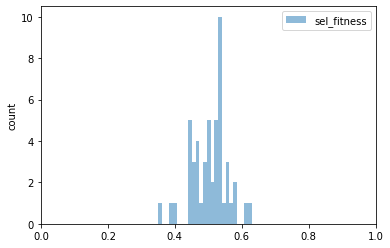

In [71]:
#now we check the distribution of selected kids fitness
plt.hist(sel_results["selected_kid_fitness"], bins = 25, alpha = 0.5, label = "sel_fitness")
# plt.hist(lucky_numbers, bins = 50, alpha = 0.5, label = "lucky_number")
# plt.hist(sel_results["final_sel_prob"], bins = 25, alpha = 0.5, label = "sel_prob")
# plt.hist(all_param_map["select_prob"], bins = 25, alpha = 0.5, label = "prob_before_start")
plt.xlim(0, 1)
plt.ylabel("count")
plt.legend()

## Magic time!

The basic procedure has been completed, but our samples were generated randomly, so the selected species are all centred at 0.5 and roughly follows a normal distribution.

In reality, we expect the population contains a few high quality species that we want to pick them out.

Let's test if this algorithm would work or not...

We will have an extreme ideal case ```ext_ideal```, which is a perfect series of 1.

Then, we manually induce 10% high quality species, by changing less than 10% digits to 0.

If we recall the idea of ```fitness```, these 10% species would give us a really high (> 0.9) fitness score compared to others.

See if we can use the algorithm above to pick out the majority of these high quality species.

In [88]:
#what if we have an extreme version of "ideal"
#let's say

ext_ideal = length * "1"
ext_ideal

'1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111'

In [89]:
#and we manually add a few high-quality species to our populations

#first, randomly generate a batch of general poluation
population_with_general_quality = generate_population(length, 90)

#create a few high quality species that is expected to give good fitness score with our extreme ideal species
high_quality_population = []
for i in range(10):
    high_quality_species = "1"*(length - i) + "0" * i
    high_quality_population.append(high_quality_species)

print(f"{high_quality_population=}")

#combine it to the general quality population
population_with_good_quality = population_with_general_quality+high_quality_population

high_quality_population=['1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111000', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111000000', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000', '1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111100000000', '11111111111111111111111111111111111111

percent_of_high_quality_species_selected=0.8


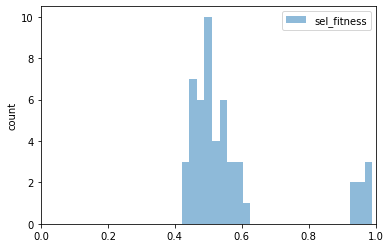

In [90]:
sel_results, all_param_map = select(population_with_good_quality, get_fitness(ext_ideal))
plt.hist(sel_results["selected_kid_fitness"], bins = 25, alpha = 0.5, label = "sel_fitness")
# plt.hist(lucky_numbers, bins = 50, alpha = 0.5, label = "lucky_number")
# plt.hist(sel_results["final_sel_prob"], bins = 25, alpha = 0.5, label = "sel_prob")
# plt.hist(all_param_map["select_prob"], bins = 25, alpha = 0.5, label = "prob_before_start")
plt.xlim(0, 1)
plt.ylabel("count")
plt.legend()

#we expect to see a few bins appearing at the region close to one

#We can also check how many of our manually created high quality species (id should = 89 to 99) were selected:

total_high_quality_species = 10

count_of_high_quality_species = 0
for i in range(89, 100):
    
    if i in sel_results["selected_kid_id"]:
        count_of_high_quality_species += 1

percent_of_high_quality_species_selected = count_of_high_quality_species/total_high_quality_species

print(f"{percent_of_high_quality_species_selected=}")

If we run the previous cells a few more times, they should give us a similar outcome and every time a high percent of our good quality species can be selected out.

We can of course modify the distribution a bit more extreme by modifying the ```good_frac``` parameter.

As ```good_frac``` increases, we expect to see higher distribution on the close-to-one region on the fitness count plot.

In [127]:
def gen_pop_with_high_quality(length, total_size, good_frac = 0.3):
    
    general_pop_size = int(total_size*(1-good_frac))
    population_with_general_quality = generate_population(length, general_pop_size)
    
    high_quality_pop_size = total_size - general_pop_size
    high_quality_population = []
    for i in range(high_quality_pop_size):
        high_quality_species = "1"*(length - i) + "0" * i
        high_quality_population.append(high_quality_species)
    
    population_with_good_quality = population_with_general_quality+high_quality_population
    return population_with_good_quality

In [137]:
total_size = 100
good_frac = 0.6
population_with_good_quality = gen_pop_with_high_quality(length, total_size, good_frac)

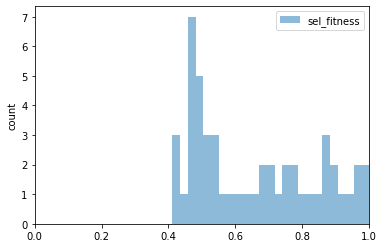

In [138]:
sel_results, all_param_map = select(population_with_good_quality, get_fitness(ext_ideal))
plt.hist(sel_results["selected_kid_fitness"], bins = 25, alpha = 0.5, label = "sel_fitness")
plt.xlim(0, 1)
plt.ylabel("count")
plt.legend()

In [139]:
total_high_quality_species = total_size - int(total_size*(1-good_frac))

count_of_high_quality_species = 0
for i in range(total_size - total_high_quality_species-1, total_size):
    
    if i in sel_results["selected_kid_id"]:
        count_of_high_quality_species += 1

percent_of_high_quality_species_selected = count_of_high_quality_species/total_high_quality_species

print(f"{percent_of_high_quality_species_selected=}")

percent_of_high_quality_species_selected=0.5833333333333334


In [140]:
# The next step we will iterate through the whole step...

## Future comments:

A few mysteries to further think about are:

1) What is the ```ideal``` in real life?

The optimal of the investigated problem.

2) What is the form of ```fitness``` function?

Could be similar to the concept ot acquisition function in BO.

3) How to determine the size of seleted subset (kids to be passed as the parents of the next generation)?

Mutate and crossover will double the size of parent population, but how many should be kept in the selection cycle?

4) Do we need to remove the good quality kids after selected?

Shall we let good quality species crossover with themselves, as possible?

5) Where does the initial population come from?

How random should we randomly prepare the initial batch of samples?

6) Where is the cut point of the mutation and when to stop mutation and crossover?

There should be a few iteration cycles until we find the optimal, and we need to consider both the mutation rate, fraction, and termination criteria.

And there is a nice reveiw paper discussed more details: https://link.springer.com/article/10.1007/s11042-020-10139-6

### and a few more philosophies...

Since the mutation has already "mutated" the gene, why do we still need crossover?

possible reason is that crossover can expand the coverage of mutated area quickly (as it is an symmetric operation).

Let's say we have two descriptors (i.e., the length of bit string is 2).

And we don't want it to be a binary string this time - we can simply set it as a float array.

See how it change when we mutate and crossover:

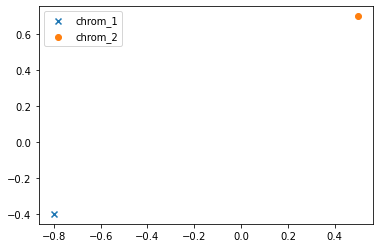

In [7]:
chrom_1 = np.array([-0.8, -0.4])
chrom_2 = np.array([0.5, 0.7])

plt.scatter(*chrom_1, marker = "x", label = "chrom_1")
plt.scatter(*chrom_2, marker = "o", label = "chrom_2")
plt.legend()

In [34]:
import itertools

In [108]:
def mut_float(ori):
    mut_var = np.random.rand()*2-1
    mut = ori*(mut_var)
    return mut

def mut_chrom(chrom):
    mut_chrom_1 = mut_float(chrom[0])*chrom[0]
    mut_chrom_2 = mut_float(chrom[1])*chrom[1]
    return np.asarray([mut_chrom_1, mut_chrom_2])

def crossover_arr_chrom(chrom_1, chrom_2, cut_point = 1):
    """
    swap the items after cut_point
    """
    gen_piece_stack_1 = chrom_1[cut_point:]
    gen_piece_stack_2 = chrom_2[cut_point:]
    chrom_3 = np.concatenate((chrom_1[:cut_point], gen_piece_stack_2))
    chrom_4 = np.concatenate((chrom_2[:cut_point], gen_piece_stack_1))
    return chrom_3, chrom_4
    
def mut_n_cross(init_chrom_1, init_chrom_2, cut_point = 1):
    population = [init_chrom_1, init_chrom_2]
    #mutation
    mut_pop = []
    for chrom in population:
        muted_chrom = mut_chrom(chrom)
        mut_pop.append(muted_chrom)
    pop_with_mut = population + mut_pop
    #generate combinations
    all_comb = itertools.combinations(pop_with_mut, 2)
    cross_pop = []
    for comb in all_comb:
        cross_3, cross_4 = crossover_arr_chrom(comb[0], comb[1], cut_point)
        cross_pop.append(cross_3)
        cross_pop.append(cross_4)
    mut_cross_pop = pop_with_mut + cross_pop
    return mut_cross_pop

In [109]:
mut_chrom(chrom_1)

array([ 0.34395076, -0.01249996])

In [110]:
crossover_arr_chrom(chrom_1, chrom_2)

(array([-0.8,  0.7]), array([ 0.5, -0.4]))

In [111]:
mut_cross_rst  = mut_n_cross(chrom_1, chrom_2)

In [112]:
mut_cross_rst

[array([-0.8, -0.4]),
 array([0.5, 0.7]),
 array([-0.28032804, -0.09682838]),
 array([-0.11211374,  0.16676907]),
 array([-0.8,  0.7]),
 array([ 0.5, -0.4]),
 array([-0.8       , -0.09682838]),
 array([-0.28032804, -0.4       ]),
 array([-0.8       ,  0.16676907]),
 array([-0.11211374, -0.4       ]),
 array([ 0.5       , -0.09682838]),
 array([-0.28032804,  0.7       ]),
 array([0.5       , 0.16676907]),
 array([-0.11211374,  0.7       ]),
 array([-0.28032804,  0.16676907]),
 array([-0.11211374, -0.09682838])]

In [113]:
itr_limit = 2
def mut_n_cross_itr(init_chrom_1, init_chrom_2, cut_point = 1, itr_limit = 10):
    new_pop = [init_chrom_1, init_chrom_2]
    for i in range(itr_limit):
        all_comb = itertools.combinations(new_pop, 2)
        itr_res = []
        
        for comb in all_comb:
            chrom_1 = comb[0]
            chrom_2 = comb[1]
#             print(comb)
            itr_res += mut_n_cross(chrom_1, chrom_2)
        new_pop.extend(itr_res)
    
    return new_pop
        

In [114]:
pop_itr_2 = mut_n_cross_itr(chrom_1, chrom_2, itr_limit = itr_limit)

In [115]:
len(pop_itr_2)

2466

In [116]:
pop_itr_2_arr = np.asarray(pop_itr_2)

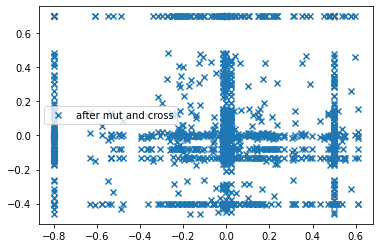

In [117]:
plt.scatter(pop_itr_2_arr[:,0], pop_itr_2_arr[:,1], marker = "x", label = "after mut and cross")
plt.legend()

#see how it expands the feature space after only 2 iterations:

In [118]:
#compare with the situation without crossover
itr_limit = 2
def mut_n_itr(init_chrom_1, init_chrom_2, cut_point = 1, itr_limit = 10, mut_time = 32):
    new_pop = [init_chrom_1, init_chrom_2]
    for i in range(itr_limit):
#         all_comb = itertools.combinations(new_pop, 2)
        itr_res = []
        #since now we don't have crossover, we call mutation more times
        for chrom in new_pop:
            for mut_n in range(mut_time):
                chrom_mut = mut_chrom(chrom)
                itr_res.append(chrom_mut)
        new_pop.extend(itr_res)
    
    return np.asarray(new_pop)
        

In [119]:
pop_itr_2_no_cross = mut_n_itr(chrom_1, chrom_2, itr_limit = itr_limit)
len(pop_itr_2_no_cross)

2178

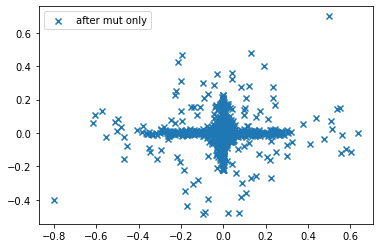

In [120]:
plt.scatter(pop_itr_2_no_cross[:,0], pop_itr_2_no_cross[:,1], marker = "x", label = "after mut only")
plt.legend()

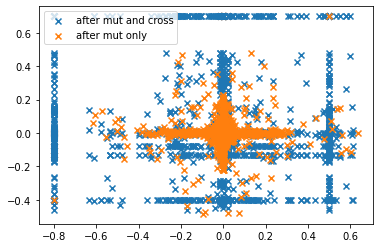

In [121]:
plt.scatter(pop_itr_2_arr[:,0], pop_itr_2_arr[:,1], marker = "x", label = "after mut and cross")
plt.scatter(pop_itr_2_no_cross[:,0], pop_itr_2_no_cross[:,1], marker = "x", label = "after mut only")
plt.legend()

#so, as we can see, crossover expands things faster than only using mutation..